# DT Classification

In [7]:
# CONTEXT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# IMPORTING THE UTILS FOR MANIPULATE THE DATASET
import sys
sys.path.append('../Classifiers/')
from dataset_utils import *

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

Import the dataset and generate the one we'll use for the classification with the fake and the real users

In [11]:
# IMPORT THE ORIGINAL DATASET
df_real = pd.read_csv('../../data/balanced_real_data.csv')
df_fake = pd.read_csv('../../data/balanced_fake_data.csv')
dataset=pd.concat([df_real,df_fake],ignore_index=True)
dataset=fix_private_entries(dataset)

In [12]:
dataset.head(10)

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,45,2979,846,0.283988,278,False,False,False,False,...,4.964205,2.464333e+01,1.759163,1.688451e+06,7930005.0,75731.0,1.964306e+06,3.858496e+12,1.947676,True
1,True,131,966,5172,5.354037,150,False,False,True,False,...,0.472582,2.233333e-01,2.951336,1.978352e+05,851011.0,3855.0,2.222041e+05,4.937467e+10,1.785389,True
2,True,128,1662,1475,0.887485,403,False,False,True,False,...,5.961543,3.554000e+01,1.546427,2.950338e+05,1128895.0,9212.0,2.417832e+05,5.845911e+10,1.726161,True
3,True,0,236,111,0.470339,43,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,True,16,386,967516,2506.518135,34,False,True,True,False,...,1180.090381,1.392613e+06,0.319856,2.418942e+06,12726352.0,36.0,2.814164e+06,7.919517e+12,2.273966,True
5,True,103,2544,1652183,649.443003,9670,False,True,False,False,...,49.513466,2.451583e+03,1.172048,7.948950e+04,287585.0,5895.0,7.382074e+04,5.449502e+09,1.315021,True
6,True,150,410,70481,171.904878,2459,False,False,True,False,...,82.691253,6.837843e+03,0.989691,3.742878e+05,827086.0,86472.0,2.019481e+05,4.078303e+10,0.286078,True
7,True,15,1269,1311,1.033097,24,False,False,True,False,...,1.742479,3.036232e+00,0.746906,4.613034e+06,24784763.0,433680.0,5.338513e+06,2.849972e+13,2.462336,True
8,True,0,755,2959,3.919205,225,False,False,True,False,...,4.325506,1.871000e+01,1.069453,1.003002e+05,413788.0,16256.0,8.768568e+04,7.688778e+09,2.289149,True
9,True,116,336,1693459,5040.056548,4214,False,True,True,False,...,153.991472,2.371337e+04,2.851830,5.910004e+04,278030.0,1313.0,7.192136e+04,5.172681e+09,2.133841,True


In [13]:
# TAKE THE TRAINSET AND THE TARGET FROM DATASET
trainset=get_trainset(dataset)
targets=get_target_dataset(dataset)

# Classification without the Statistics from the Media of the Users 

In [14]:
# DELETING THE STATISTICS OF THE USERS CONTENTS
trainset_without_stats=drop_stats(trainset)

In [15]:
# TRAINING THE DECISION TREE WITHOUT STATISTICS OF THE USERS CONTENTS
x_train, x_test, y_train, y_test = train_test_split(trainset_without_stats, targets, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=3)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)


# Confusion Matrix 

In [16]:
print(confusion_matrix(y_test, predictions))


[[1412  149]
 [ 172 1329]]


# Classification Report

In [17]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.89      0.90      0.90      1561
        True       0.90      0.89      0.89      1501

    accuracy                           0.90      3062
   macro avg       0.90      0.89      0.90      3062
weighted avg       0.90      0.90      0.90      3062



# Result Decision Tree

In [18]:
from sklearn import tree
import pydotplus
from IPython.display import Image

features=list(trainset_without_stats.columns)


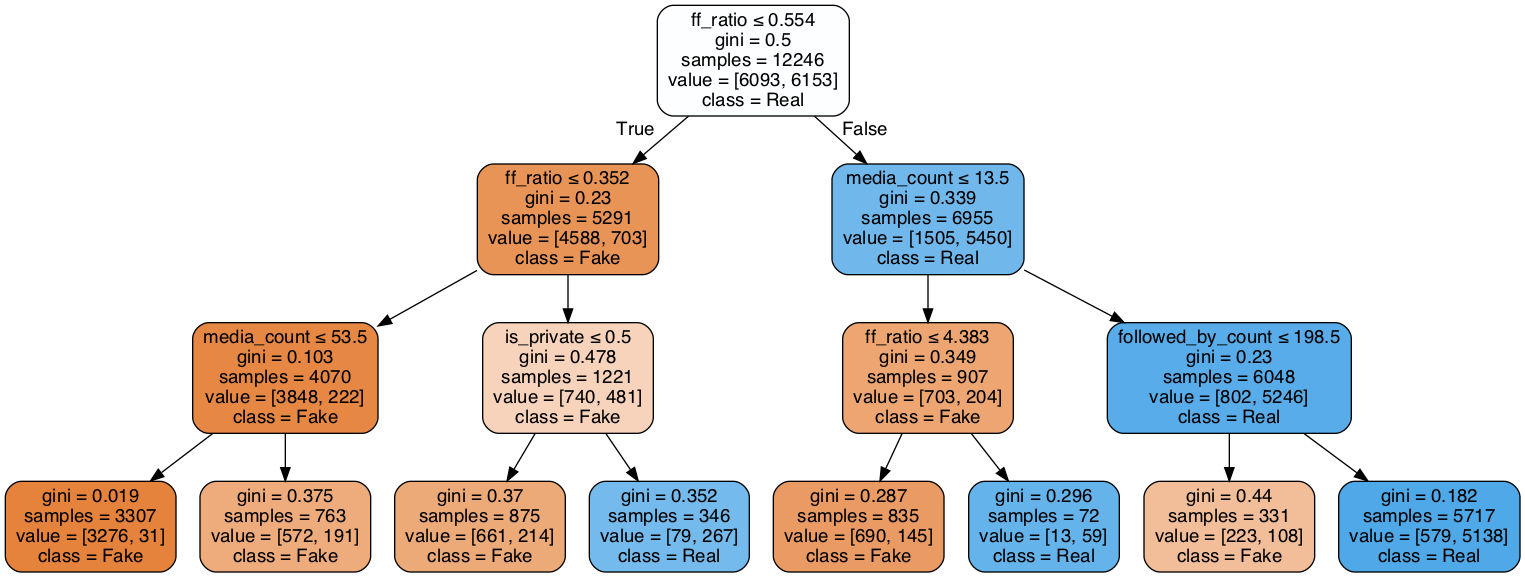

In [19]:
# Getting the columns names for render the tree
features=list(trainset_without_stats.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Classification with only Public Profile (with Media Stats)

In [20]:
# CLASSIFICATION OF ONLY PUBLIC PROFILES
dataset_publics=drop_NaN_entries(dataset)
trainset_publics=get_trainset(dataset_publics)
targets_publics=get_target_dataset(dataset_publics)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(trainset_publics, targets_publics, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=7)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)

# Confusion Matrix 

In [22]:
print(confusion_matrix(y_test, predictions))

[[1025  128]
 [  78 1061]]


# Classification Report

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      1153
        True       0.89      0.93      0.91      1139

    accuracy                           0.91      2292
   macro avg       0.91      0.91      0.91      2292
weighted avg       0.91      0.91      0.91      2292



# Result Decision Tree

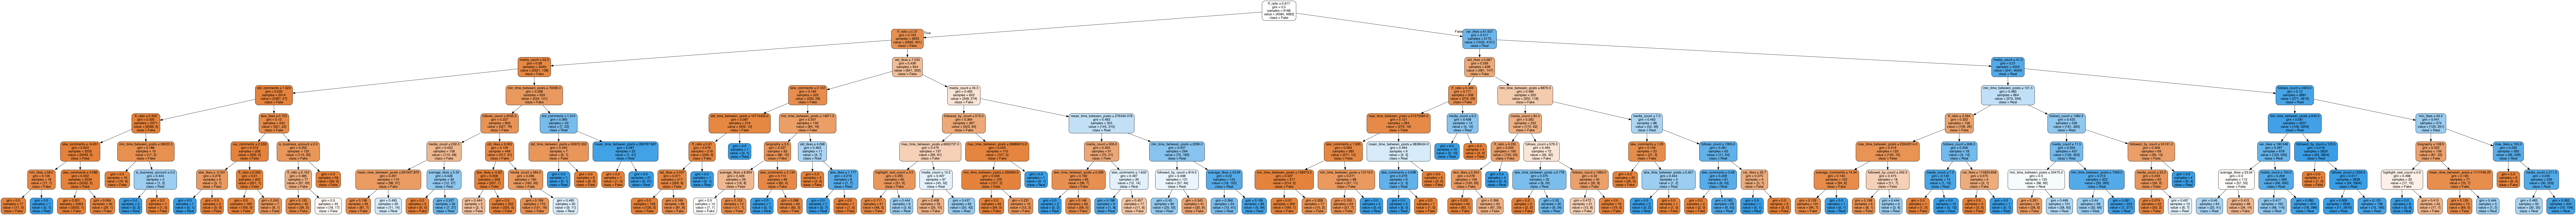

In [24]:
# Getting the columns names for render the tree
features=list(trainset_publics.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Classification with NaN Values replaced with Median

In [25]:
# CLASSIFICATION WITH NaN VALUES REPLACED WITH STATISTICS
dataset_median=fill_NaN_median(dataset)
trainset_median=get_trainset(dataset_median)
targets_median=get_target_dataset(dataset_median)
print(dataset_median.shape)

(15308, 30)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(trainset_median, targets_median, test_size = 0.2, random_state = 12345)
dtc = DecisionTreeClassifier(random_state=0,max_depth=5)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)

# Confusion Matrix 

In [27]:
print(confusion_matrix(y_test, predictions))

[[1396  165]
 [  91 1410]]


# Classification Report

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.94      0.89      0.92      1561
        True       0.90      0.94      0.92      1501

    accuracy                           0.92      3062
   macro avg       0.92      0.92      0.92      3062
weighted avg       0.92      0.92      0.92      3062



# Result Decision Tree

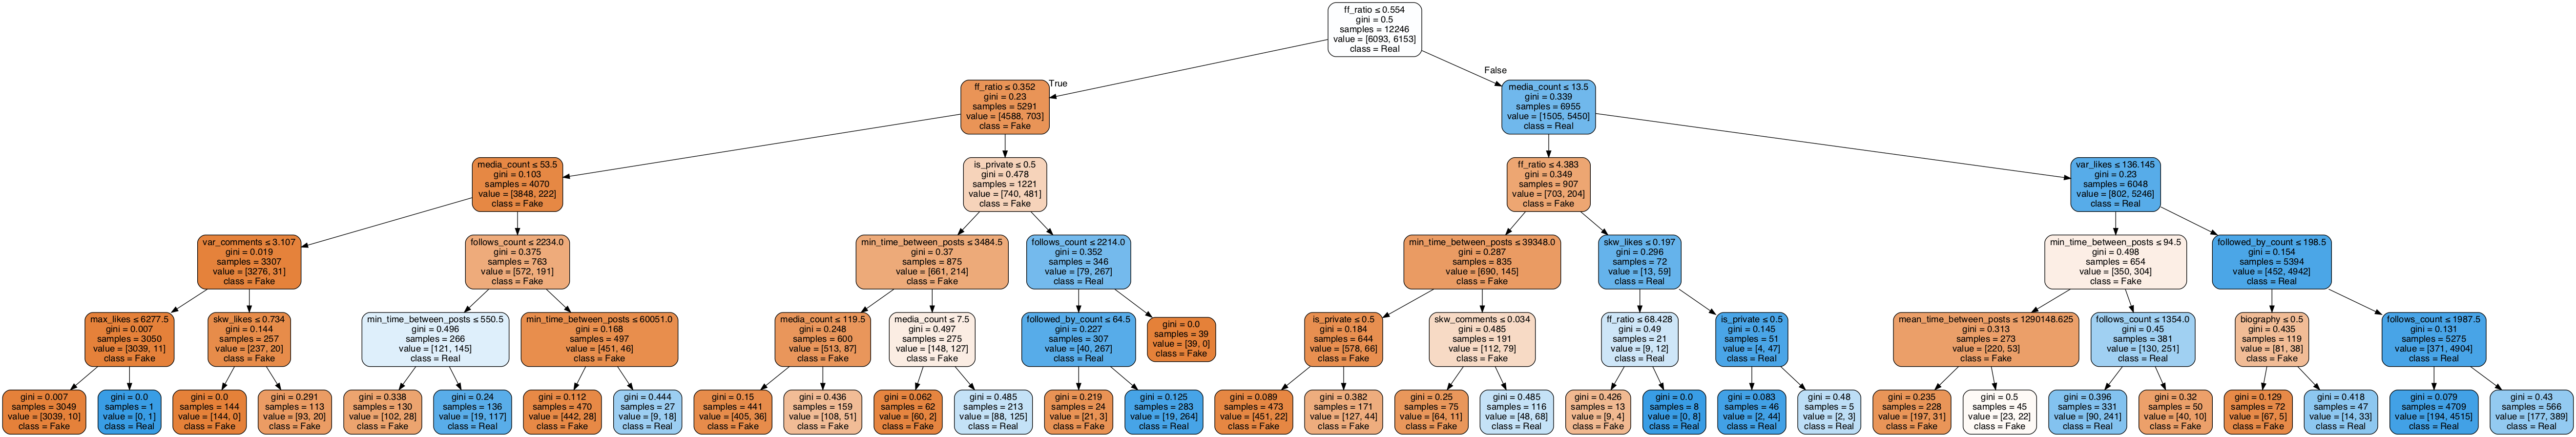

In [29]:
# Getting the columns names for render the tree
features=list(trainset_median.columns)

dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=features,class_names=['Fake','Real'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 